# Multivariate Linear Regression
## Predicting Healthcare COVID Insurance Price from age, race, ethnicity, gender, latitude, longitude

### Import Libraries

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Read Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
#dataset
data = pd.read_csv('https://storage.googleapis.com/dataprep-staging-b4c6b8ff-9afc-4b23-a0d8-d480526baaa4/yz1268%40nyu.edu/jobrun/Untitled%20recipe%20%E2%80%93%204.csv/2021-08-16_23-54-42_00000000')
#to see what my dataset is comprised of
data.head()
#healthcare_coverage,age,race, ethnicity, gender, latitude, longitude,healthcare expense.
#the first column is y, the rest are all x1, x2,...xn.

,1499.08,5,0,0.1,0.2,42.15196147,-72.5989594,8446.49
0,1845.72,29,0,0,1,42.177370,-71.281353,89893.40
1,3528.84,17,0,0,0,42.181642,-72.608842,577445.86
2,2705.64,24,0,0,1,42.075292,-70.757035,336701.72
3,3043.04,2,0,0,0,42.352434,-71.028610,484076.34
4,893.28,37,0,0,1,42.740220,-72.722648,22940.00


In [3]:
data.shape


(12351, 8)

In [4]:
print(type(data))
#print(data.keys())
data = data.to_numpy()
print(type(data))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [5]:
print(data)

[[ 1.84572000e+03  2.90000000e+01  0.00000000e+00 ...  4.21773702e+01
  -7.12813532e+01  8.98934000e+04]
 [ 3.52884000e+03  1.70000000e+01  0.00000000e+00 ...  4.21816423e+01
  -7.26088422e+01  5.77445860e+05]
 [ 2.70564000e+03  2.40000000e+01  0.00000000e+00 ...  4.20752915e+01
  -7.07570347e+01  3.36701720e+05]
 ...
 [ 2.60014100e+04  1.02000000e+02  0.00000000e+00 ...  4.23961856e+01
  -7.12179277e+01  1.34793008e+06]
 [ 3.20069700e+04  8.00000000e+01  0.00000000e+00 ...  4.23667684e+01
  -7.11967152e+01  1.58563129e+06]
 [ 7.90451350e+05  1.21000000e+02  0.00000000e+00 ...  4.17216614e+01
  -7.05872141e+01  1.68923958e+06]]


In [6]:
data.shape

(12351, 8)

### Normalize Data

In [7]:
data = normalize(data, axis=0)
#data = data.values.tolist()

In [8]:
#print(data[0])
print('the Y value in regression model',data[:,0:1])
print('the X1 & X2 values in regression model',data[:,1:3])

the Y value in regression model [[0.00036224]
 [0.00069257]
 [0.00053101]
 ...
 [0.005103  ]
 [0.00628165]
 [0.15513295]]
the X1 & X2 values in regression model [[0.0046234  0.        ]
 [0.00271027 0.        ]
 [0.00382626 0.        ]
 ...
 [0.0162616  0.        ]
 [0.0127542  0.        ]
 [0.01929073 0.        ]]


### Seperate Data into X and Y

In [9]:
X = data[:, 1:6]
#X = data[:, 1:7] The last column is the medical expense, it is not used in the first train.
Y = data[:, 0:1]
#https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/

In [10]:
#X[:, 6]
data[:, ]

array([[ 0.00036224,  0.0046234 ,  0.        , ...,  0.00897818,
        -0.00898765,  0.00081189],
       [ 0.00069257,  0.00271027,  0.        , ...,  0.00897909,
        -0.00915503,  0.00521534],
       [ 0.00053101,  0.00382626,  0.        , ...,  0.00895645,
        -0.00892154,  0.003041  ],
       ...,
       [ 0.005103  ,  0.0162616 ,  0.        , ...,  0.00902476,
        -0.00897965,  0.01217416],
       [ 0.00628165,  0.0127542 ,  0.        , ...,  0.0090185 ,
        -0.00897698,  0.01432102],
       [ 0.15513295,  0.01929073,  0.        , ...,  0.00888117,
        -0.00890013,  0.01525678]])

In [11]:
X.size

61755

In [12]:
print(X)

[[0.0046234  0.         0.         0.01264608 0.00897818]
 [0.00271027 0.         0.         0.         0.00897909]
 [0.00382626 0.         0.         0.01264608 0.00895645]
 ...
 [0.0162616  0.         0.         0.01264608 0.00902476]
 [0.0127542  0.         0.         0.01264608 0.0090185 ]
 [0.01929073 0.         0.         0.         0.00888117]]


### Visualize the Data

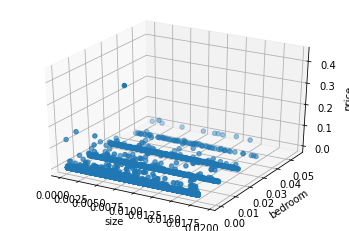

In [13]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('size')
ax.set_ylabel('bedroom')
ax.set_zlabel('price')

plt.show()

### Hyperparameters

In [14]:
learning_rate = 0.09
max_iteration = 500

In [15]:
s_learning_rate = 0.06
s_max_iteration = 500

In [16]:

mb_learning_rate = 0.09
mb_max_iteration = 500
batch_size = 16

### Parameters

In [17]:
theta = np.zeros((X.shape[1]+1, 1))
#theta = np.zeros(data.shape[1])
s_theta = np.zeros((X.shape[1]+1, 1))
mb_theta = np.zeros((X.shape[1]+1, 1))

In [18]:
#np.zeros(data.shape[1])
X.shape[1]

5

In [19]:
theta.size

6

In [20]:
data.shape[0]

12351

In [21]:
tempX = np.ones((X.shape[0], X.shape[1] + 1))
print(tempX)

[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 ...
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [22]:
tempX[:,1:].size

61755

In [23]:
tempX.size

74106

In [24]:
np.matmul(tempX, theta)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Hypothesis

In [25]:
def h (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

### Loss Function

In [26]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - h(theta, X))) / 2

### Calculate Gradients

In [27]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

### Batch Gradient Descent

In [28]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Mini-Batch Gradient Descent

In [29]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(0, X.shape[0], batch_size):
      d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Stochastic Gradient Descent

In [30]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

### Train Model

In [31]:
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  3.9910419500240205e-05
iteration :  100  loss :  3.7154880249098625e-05
iteration :  200  loss :  3.7154849977961215e-05
iteration :  300  loss :  3.7154819751311256e-05
iteration :  400  loss :  3.715478955147231e-05


In [32]:
s_theta, s_cost = stochastic_gradient_descent (s_theta, X, Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  7.658428343901709e-05
iteration :  100  loss :  7.62977252802232e-05
iteration :  200  loss :  7.625446049824406e-05
iteration :  300  loss :  7.624108980549722e-05
iteration :  400  loss :  7.623774827636606e-05


In [33]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X, Y, mb_learning_rate, mb_max_iteration, batch_size, 100)

iteration :  0  loss :  3.72209894274267e-05
iteration :  100  loss :  3.720542925941344e-05
iteration :  200  loss :  3.719744174813267e-05
iteration :  300  loss :  3.719314713074294e-05
iteration :  400  loss :  3.719073782829022e-05


### Optimal values of Parameters using Trained Model

In [34]:
theta

array([[ 2.57942984e-03],
       [ 4.73064061e-05],
       [ 4.21061601e-05],
       [-2.72333815e-05],
       [-4.46300075e-05],
       [ 2.30123745e-05]])

In [35]:
s_theta

array([[ 0.01148305],
       [ 0.01961533],
       [ 0.01219439],
       [-0.008928  ],
       [-0.03451713],
       [-0.0005793 ]])

In [36]:
mb_theta

array([[ 2.99219170e-03],
       [ 1.51226829e-02],
       [ 1.00448381e-02],
       [-9.29143395e-03],
       [-2.51631346e-02],
       [-9.19084176e-05]])

### Cost vs Iteration Plots

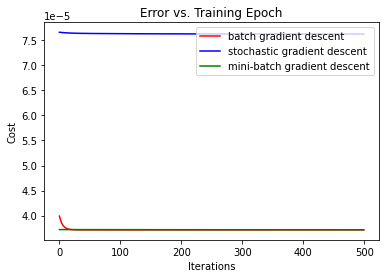

In [37]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), s_cost, 'b')  
ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent', 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()